# Python Test Workbook

Creating a new environment and downloading the latest version of pycaret. Done in the Anaconda Prompt

https://www.google.com/search?q=hjow+to+install+the+latest+pycaret+version+on+anaconda&rlz=1C1GCEA_enUS1012US1012&oq=hjow+to+install+the+latest+pycaret+version+on+anaconda&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQRRhA0gEJMTAxNzVqMWo0qAIAsAIA&sourceid=chrome&ie=UTF-8#kpvalbx=_82fNZLKrM7qiptQPnJCt2Ac_30

1. conda create -n newpycaret python=3.9.13 # create enironment called newpycaret
   1. need to check what version of python is on computer
2. activate newpycaret # activate environment
3. pip install pycaret
4. pip install snowflake-connector-python
5. pip install ipykernel # for jupyter notebook in vs code

* ctrl_shift+p to open command palette in vs code. Make sure to select interpreter with new environment (newpycaret)



# Time Series with Pycaret

https://moez-62905.medium.com/pycaret-3-is-coming-whats-new-8d7d241c40d8


In [2]:
# Packages
import snowflake.connector
import pandas as pd
import os
import numpy as np

# The Data

In [ ]:
# copy and paste in to a new chunk, enter credentials and run to save in environment. Then delete chunk
%env snowflakeuser=<your_snowflake_username>
%env snowflakepass=<your_snowflake_password>

In [2]:
# Query Snowflake

def snowflake_to_pandas(connection_params, query):
    try:
        # Establish a connection to Snowflake
        conn = snowflake.connector.connect(**connection_params)

        # Execute the SQL query and fetch the results into a DataFrame
        df = pd.read_sql_query(query, conn)

        # Close the connection
        conn.close()

        return df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Snowflake connection parameters
connection_params = {
    "user": os.environ['snowflakeuser'],
    "password": os.environ['snowflakepass'],
    "account": "zib52348.us-east-1",
    "role": "ACCOUNTADMIN",
    "warehouse": "REPORTING",
    "database": "ANALYTICS",
    "schema": "FORECASTING",
}

# SQL command 
query = 'SELECT * FROM "ANALYTICS"."FORECASTING"."sales_fcast_combined_v"'

# Call the function to retrieve the data into a Pandas DataFrame
result_df = snowflake_to_pandas(connection_params, query)

if result_df is not None:
    print(result_df.head())  # Display the first few rows of the DataFrame
else:
    print("Failed to retrieve data from Snowflake.")

NameError: name 'os' is not defined

In [13]:
# Data prep
result_df["MONTH"] = pd.to_datetime(result_df["MONTH"])

# Start with just looking at domestic DTC
df_200_155 = result_df[result_df["DEP_ENT"] == '200_155']
df_200_155 = df_200_155[df_200_155['MONTH'] <= pd.Timestamp(2023,6,1)] 
"""
ABOVE: we have data beyond july '23, but we want to compare with 
some models that only had through june. No way to check model accuracy beyond the daya we have
"""
df_200_155 = df_200_155[["MONTH", "NET_SALES"]] # select fields
df_200_155 = df_200_155.sort_values(['MONTH']) # reorder

df_200_155.dtypes

MONTH        datetime64[ns]
NET_SALES           float64
dtype: object

In [ ]:
# create index
df_200_155.set_index('MONTH', drop = True, inplace=True)

<Axes: xlabel='MONTH'>

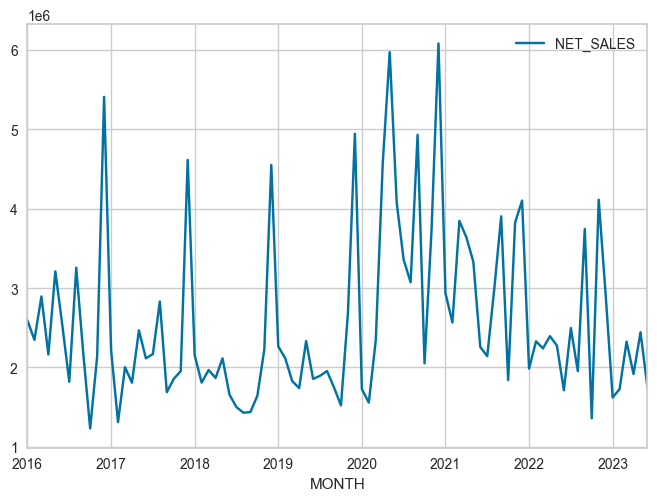

In [17]:
# quick viz
df_200_155.plot()

In [18]:
# check version - 3.0.4 is newest
from pycaret.utils import version
version()

'3.0.4'

In [19]:
from pycaret.time_series import *

In [21]:
# fh is basically what you want to hold out for testing
s = setup(df_200_155, fold = 3, fh = 14, session_id = 123) # session id is for reproducability

,Description,Value
0,session_id,123
1,Target,NET_SALES
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(76, 1)"
7,Transformed test set shape,"(14, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [22]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,90.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,2580538.262138
3,Summary,Statistics,Transformed,Median,,2224486.9
4,Summary,Statistics,Transformed,Standard Deviation,,1073172.834318
5,Summary,Statistics,Transformed,Variance,,1151699932317.54834
6,Summary,Statistics,Transformed,Kurtosis,,1.529008
7,Summary,Statistics,Transformed,Skewness,,1.406315
8,Summary,Statistics,Transformed,# Distinct Values,,90.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",75.73407


In [23]:
plot_model()

In [24]:
plot_model(plot = 'train_test_split')

In [25]:
plot_model(plot = 'cv')

In [26]:
plot_model(plot = 'acf')

In [27]:
plot_model(plot = 'pacf')

In [28]:
plot_model(plot = 'diagnostics')

In [30]:
?plot_model

Signature:
plot_model(
    estimator: Optional[Any] = None,
    plot: Optional[str] = None,
    return_fig: bool = False,
    return_data: bool = False,
    verbose: bool = False,
    display_format: Optional[str] = None,
    data_kwargs: Optional[Dict] = None,
    fig_kwargs: Optional[Dict] = None,
    save: Union[str, bool] = False,
) -> Optional[Tuple[str, list]]
Docstring:
This function analyzes the performance of a trained model on holdout set.
When used without any estimator, this function generates plots on the
original data set. When used with an estimator, it will generate plots on
the model residuals.


Example
--------
>>> from pycaret.datasets import get_data
>>> airline = get_data('airline')
>>> from pycaret.time_series import *
>>> exp_name = setup(data = airline,  fh = 12)
>>> plot_model(plot="diff", data_kwargs={"order_list": [1, 2], "acf": True, "pacf": True})
>>> plot_model(plot="diff", data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True})
>>> arima = 

In [33]:
# Trains two categories of models
    # Traditional time series - ARIMA, ETS
    # Machine learning models - linear regression, lasso, ridge
best = compare_models(sort = 'MAPE')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,1.7546,1.8007,827503.4888,1056874.5109,0.2712,0.3161,0.0642,0.0500
grand_means,Grand Means Forecaster,1.9805,2.1088,934898.8772,1247766.7564,0.2730,0.3089,-0.3140,0.0133
croston,Croston,1.9554,2.1262,930321.2749,1263131.6253,0.2874,0.3044,-0.3538,0.0133
exp_smooth,Exponential Smoothing,1.9911,1.9230,911879.9782,1106116.9761,0.2876,0.3430,-0.0095,0.0567
snaive,Seasonal Naive Forecaster,1.8842,1.8124,922179.7498,1149898.2071,0.2918,0.3027,-0.5163,0.0267
theta,Theta Forecaster,1.9382,1.8823,937462.8457,1169298.3601,0.2952,0.3193,-0.3674,0.0233
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,2.1592,2.0695,989525.7687,1206556.5469,0.3074,0.3966,-0.2439,0.1500
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,2.2692,2.2918,1047730.2055,1336969.6110,0.3077,0.3845,-0.4856,0.1433
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,2.2074,2.2165,1022795.4133,1291049.8473,0.3094,0.3795,-0.3983,0.2600
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,2.1449,2.0206,986849.9214,1171450.4581,0.3100,0.3774,-0.1670,0.1700


In [34]:
best

AutoETS(seasonal='mul', sp=12, trend='add')

In [35]:
best.get_params()

{'additive_only': False,
 'allow_multiplicative_trend': False,
 'auto': False,
 'bounds': None,
 'callback': None,
 'damped_trend': False,
 'dates': None,
 'disp': False,
 'error': 'add',
 'freq': None,
 'full_output': True,
 'ignore_inf_ic': True,
 'information_criterion': 'aic',
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'maxiter': 1000,
 'missing': 'none',
 'n_jobs': None,
 'random_state': None,
 'restrict': True,
 'return_params': False,
 'seasonal': 'mul',
 'sp': 12,
 'start_params': None,
 'trend': 'add'}

In [36]:
# now we can use the best model to predict ahead
# this starts the period after the training set ends
predict_model(best, fh = 6)

,y_pred
2022-05,2.601008e+06
2022-06,1.968954e+06
2022-07,1.929387e+06
2022-08,2.298591e+06
2022-09,2.676315e+06
2022-10,1.325066e+06


In [38]:
# we can use the finalize model to use the testing data as well
final_best = finalize_model(best)

In [39]:
# then we can predict 6 periods ahead
predict_model(final_best, fh = 6)

,y_pred
2023-07,2.063783e+06
2023-08,1.855187e+06
2023-09,2.918467e+06
2023-10,1.141255e+06
2023-11,2.731882e+06
2023-12,2.384111e+06


In [40]:
plot_model(best, plot = 'forecast')

In [42]:
# fh = forecast horizon
plot_model(best, plot = 'forecast', data_kwargs = {'fh': 24})

In [43]:
# show the model fit
plot_model(best, plot = 'insample')

In [44]:
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2018-10,1.0844,1.0431,526906.1468,611805.3623,0.2307,0.2727,0.6262
1,2019-12,3.7157,3.6896,1478647.4987,1822152.7021,0.3890,0.4956,-0.6557
2,2021-02,1.7999,1.4668,1271382.9145,1531259.7253,0.4606,0.3533,-2.6883
Mean,NaT,2.2000,2.0665,1092312.1866,1321739.2633,0.3601,0.3739,-0.9059
SD,NaT,1.1108,1.1607,408658.4918,515854.8173,0.0960,0.0921,1.3646


In [45]:
tuned_arima = tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2018-10,0.3571,0.3993,173524.8684,234198.9833,0.0833,0.0838,0.9452
1,2019-12,2.6050,2.7292,1036649.9334,1347877.0840,0.3119,0.3189,0.0940
2,2021-02,2.9737,2.2044,2100528.9879,2301261.2537,0.7967,0.5397,-7.3303
Mean,NaT,1.9786,1.7776,1103567.9299,1294445.7737,0.3973,0.3141,-2.0970
SD,NaT,1.1564,0.9979,788117.8985,844719.9876,0.2974,0.1861,3.7168


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.3s finished


In [46]:
blender = blend_models([arima, tuned_arima])

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2018-10,0.6465,0.6577,314122.4969,385780.4969,0.1360,0.1505,0.8514
1,2019-12,2.7940,3.0661,1111877.1037,1514270.4272,0.2922,0.3436,-0.1434
2,2021-02,2.3868,1.8101,1685955.9512,1889572.4539,0.6286,0.4554,-4.6164
Mean,NaT,1.9424,1.8446,1037318.5173,1263207.7927,0.3523,0.3165,-1.3028
SD,NaT,0.9313,0.9835,562524.6624,639073.2339,0.2056,0.1259,2.3780


In [47]:
# saves as a pickle file
save_model(best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 AutoETS(seasonal='mul',
                                                                         sp=12,
                                                                         trend='add'))]))]),
 'my_best_model.pkl')

In [48]:
l = load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded


In [49]:
l

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                AutoETS(seasonal='mul',
                                                                        sp=12,
                                                                        trend='add'))]))])